In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_file = "Data/train.csv"
test_file = "Data/test.csv"

In [5]:
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

# Reshape data
We get rid of first column and put the y in the last position

In [6]:
df_train  = df_train.drop( "i", axis = 1)
y = df_train.pop("y")
df_train.insert(54, "y", y)

In [7]:

test_i_column = df_test.loc[:, "i"]
df_test = df_test.drop(["y", "i"], axis = 1)
df_test.loc[:, "c1":"c12"] = df_test.loc[:, "c1":"c12"].astype("category")
df_test.loc[:, ["o1", "o2"]] = df_test.loc[:, ["o1", "o2"]].astype("category")

# Checking data types

In [8]:
df_train.loc[:, "c1":"c12"] = df_train.loc[:, "c1":"c12"].astype("category")
df_train.loc[:, ["o1", "o2", "y"]] = df_train.loc[:, ["o1", "o2", "y"]].astype("category")

In [9]:
df_train.dtypes

x1      float64
x2      float64
x3      float64
x4      float64
x5      float64
x6      float64
x7      float64
x8      float64
x9      float64
x10     float64
x11     float64
x12     float64
x13     float64
x14     float64
x15     float64
x16     float64
x17     float64
x18     float64
x19     float64
x20     float64
x21     float64
x22     float64
x23     float64
x24     float64
x25     float64
x26     float64
x27     float64
x28     float64
x29     float64
x30     float64
x31     float64
x32     float64
x33     float64
x34     float64
x35     float64
x36     float64
x37     float64
x38     float64
x39     float64
x40     float64
c1     category
c2     category
c3     category
c4     category
c5     category
c6     category
c7     category
c8     category
c9     category
c10    category
c11    category
c12    category
o1     category
o2     category
y      category
dtype: object

# Checking NAs

In [10]:
for i in range(df_train.shape[1]):
    print("Column: ", df_train.columns[i], "NAs: ", df_train.iloc[:, i].isnull().sum())

Column:  x1 NAs:  0
Column:  x2 NAs:  0
Column:  x3 NAs:  4
Column:  x4 NAs:  8
Column:  x5 NAs:  4
Column:  x6 NAs:  8
Column:  x7 NAs:  3
Column:  x8 NAs:  2
Column:  x9 NAs:  92
Column:  x10 NAs:  104
Column:  x11 NAs:  1
Column:  x12 NAs:  3
Column:  x13 NAs:  2163
Column:  x14 NAs:  2151
Column:  x15 NAs:  1056
Column:  x16 NAs:  1066
Column:  x17 NAs:  1633
Column:  x18 NAs:  1643
Column:  x19 NAs:  1
Column:  x20 NAs:  0
Column:  x21 NAs:  390
Column:  x22 NAs:  378
Column:  x23 NAs:  422
Column:  x24 NAs:  413
Column:  x25 NAs:  0
Column:  x26 NAs:  0
Column:  x27 NAs:  0
Column:  x28 NAs:  0
Column:  x29 NAs:  0
Column:  x30 NAs:  0
Column:  x31 NAs:  0
Column:  x32 NAs:  0
Column:  x33 NAs:  0
Column:  x34 NAs:  0
Column:  x35 NAs:  0
Column:  x36 NAs:  0
Column:  x37 NAs:  25
Column:  x38 NAs:  0
Column:  x39 NAs:  0
Column:  x40 NAs:  0
Column:  c1 NAs:  0
Column:  c2 NAs:  0
Column:  c3 NAs:  0
Column:  c4 NAs:  0
Column:  c5 NAs:  0
Column:  c6 NAs:  0
Column:  c7 NAs:  0

In [9]:
print(df_train.shape)
print(df_train.shape[0] - df_train.dropna().shape[0])
print(df_train.dropna().shape[0])

(5832, 55)
3427
2405


# Checking unbalanced

In [10]:
print(df_train["y"].value_counts())
print("Percentage of minority class: " , df_train["y"].value_counts()[1]/sum(df_train["y"].value_counts()))

0    3753
1    2079
Name: y, dtype: int64
Percentage of minority class:  0.35648148148148145


We cannot consider a *true* unbalanced problem since the minority class constitutes a 35% of the total set

# Correlation

<AxesSubplot:>

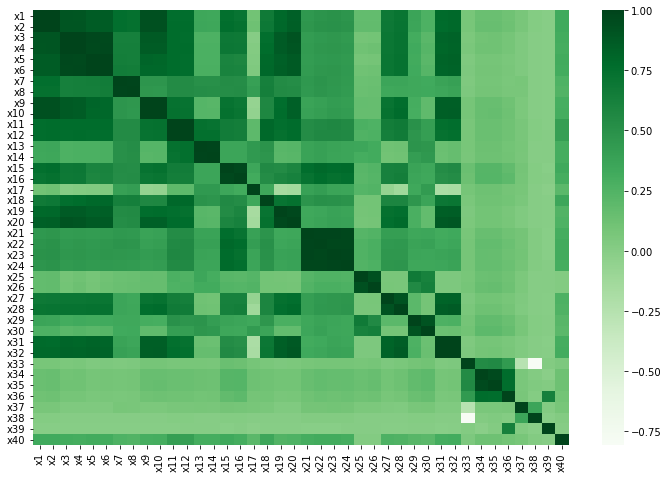

In [11]:
corr = df_train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=False)

# Cleaning of NAs

In [12]:
df_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,c5,c6,c7,c8,c9,c10,c11,c12,o1,o2
0,1.6382,1.5961,1.1843,1.1702,1.8396,1.8160,1.8586,1.8619,1.2993,1.1989,...,22,2,2,0,20,22,2,2,26,6
1,-0.0305,-0.0323,-0.0259,-0.0274,-0.0317,-0.0339,-0.0362,-0.0357,-0.0240,-0.0263,...,22,2,8,0,20,22,2,8,22,6
2,0.0536,0.0586,0.0872,0.0811,0.1498,0.1392,0.1721,0.1469,-0.0167,-0.0054,...,22,2,8,0,20,22,2,8,24,6
3,0.0726,0.0490,0.0617,0.0595,0.1100,0.1060,0.1164,0.0911,0.0391,0.0149,...,22,2,4,0,28,22,2,4,24,6
4,-0.0184,-0.0194,-0.0241,-0.0257,-0.0291,-0.0314,-0.0161,-0.0157,-0.0178,-0.0197,...,22,2,6,0,20,22,2,6,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,-0.0276,-0.0296,-0.0230,-0.0239,-0.0300,-0.0313,-0.0309,-0.0300,-0.0228,-0.0259,...,22,2,8,0,28,22,2,8,24,28
5830,-0.0295,-0.0309,-0.0259,-0.0274,-0.0316,-0.0337,-0.0311,-0.0303,-0.0253,-0.0277,...,22,2,4,0,28,22,2,4,22,28
5831,0.0753,0.0590,0.0299,0.0422,0.0589,0.0787,-0.0221,-0.0139,0.1157,0.0947,...,22,2,4,0,28,22,2,4,26,28
5832,-0.0286,-0.0278,-0.0259,-0.0274,-0.0317,-0.0339,-0.0309,-0.0293,-0.0242,-0.0237,...,22,2,4,0,20,22,2,4,22,28


In [13]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_train)

df_train_noNAs=pd.DataFrame(imp_mean.fit_transform(df_train))
df_train_noNAs.columns=df_train.columns
df_train_noNAs.index=df_train.index

df_test_noNAs=pd.DataFrame(imp_mean.fit_transform(df_test))
df_test_noNAs.columns=df_test.columns
df_test_noNAs.index=df_test.index



In [14]:
for i in range(df_train_noNAs.shape[1]):
    print("Columna ", df_train_noNAs.columns[i], "NAs: ", df_train_noNAs.iloc[:, i].isnull().sum())

Columna  x1 NAs:  0
Columna  x2 NAs:  0
Columna  x3 NAs:  0
Columna  x4 NAs:  0
Columna  x5 NAs:  0
Columna  x6 NAs:  0
Columna  x7 NAs:  0
Columna  x8 NAs:  0
Columna  x9 NAs:  0
Columna  x10 NAs:  0
Columna  x11 NAs:  0
Columna  x12 NAs:  0
Columna  x13 NAs:  0
Columna  x14 NAs:  0
Columna  x15 NAs:  0
Columna  x16 NAs:  0
Columna  x17 NAs:  0
Columna  x18 NAs:  0
Columna  x19 NAs:  0
Columna  x20 NAs:  0
Columna  x21 NAs:  0
Columna  x22 NAs:  0
Columna  x23 NAs:  0
Columna  x24 NAs:  0
Columna  x25 NAs:  0
Columna  x26 NAs:  0
Columna  x27 NAs:  0
Columna  x28 NAs:  0
Columna  x29 NAs:  0
Columna  x30 NAs:  0
Columna  x31 NAs:  0
Columna  x32 NAs:  0
Columna  x33 NAs:  0
Columna  x34 NAs:  0
Columna  x35 NAs:  0
Columna  x36 NAs:  0
Columna  x37 NAs:  0
Columna  x38 NAs:  0
Columna  x39 NAs:  0
Columna  x40 NAs:  0
Columna  c1 NAs:  0
Columna  c2 NAs:  0
Columna  c3 NAs:  0
Columna  c4 NAs:  0
Columna  c5 NAs:  0
Columna  c6 NAs:  0
Columna  c7 NAs:  0
Columna  c8 NAs:  0
Columna  

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_train_noNAs.iloc[:, 0:-1]
y = df_train_noNAs.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.6915167095115681


In [59]:
def pred_to_csv(preds, name = "preds"):
    index = pd.read_csv("data/test.csv").loc[ :, "i"]
    prediction = pd.concat([index, pd.DataFrame(preds).astype(int)] , axis=1)
    prediction.columns = ["i", "y"]
    prediction.to_csv(name + ".csv", index=False)
    return prediction


In [17]:
y_pred = clf.predict(df_test_noNAs)
prediction = pred_to_csv(y_pred)

# Metrics
We prepare some functions to study different metrics that can be interesting in the study of the data. 
IDEA: see if one of it is related to the metric used by kaggle

In [27]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def compute_metrics(y_hat, y):
    metrics = {"F1: ": f1_score(y_hat, y),
                "Precision: " : precision_score(y_hat, y),
                "Recall: " : recall_score(y_hat, y),
                "Accuracy: ":  accuracy_score(y_hat, y)}
    return metrics

In [42]:
from sklearn.model_selection import cross_validate
import sklearn.metrics

def cv_metrics_summary(model, X, y, no_cv=10, scoring=['f1','precision', 'recall', 'accuracy' ]):
    metrics_cv = pd.DataFrame(cross_validate(model, X, y, cv=no_cv, scoring=scoring))
    metrics_cv.loc['mean'] = metrics_cv.mean()
    return metrics_cv
    

In [21]:
compute_metrics(clf.predict(X_test), y_test)

{'F1: ': 0.36842105263157887,
 'Precision: ': 0.25735294117647056,
 'Recall: ': 0.6481481481481481,
 'Accuracy: ': 0.6915167095115681}

In [43]:
cv_metrics_summary(clf, X, y)

,fit_time,score_time,test_f1,test_precision,test_recall,test_accuracy
0,1.069696,0.020528,0.451807,0.604839,0.360577,0.688356
1,1.034064,0.020258,0.408163,0.697674,0.288462,0.702055
2,1.035312,0.020701,0.391892,0.651685,0.280193,0.691252
3,1.067144,0.020319,0.283636,0.582090,0.187500,0.662093
4,1.027659,0.020774,0.303704,0.661290,0.197115,0.677530
5,1.041582,0.020872,0.254826,0.647059,0.158654,0.668954
6,1.046455,0.020792,0.340580,0.691176,0.225962,0.687822
7,1.040952,0.021062,0.200000,0.595238,0.120192,0.656947
8,1.035821,0.019884,0.278195,0.637931,0.177885,0.670669
9,1.051492,0.018466,0.540084,0.481203,0.615385,0.626072


# SVM
## Linear kernel

In [48]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))


In [49]:
cv_metrics_summary(clf, X, y)

,fit_time,score_time,test_f1,test_precision,test_recall,test_accuracy
0,1.150654,0.131416,0.313433,0.700000,0.201923,0.684932
1,1.146921,0.130742,0.339768,0.862745,0.211538,0.707192
2,1.110420,0.132221,0.298387,0.902439,0.178744,0.701544
3,1.122761,0.129512,0.170213,0.740741,0.096154,0.665523
4,1.135939,0.138966,0.197425,0.920000,0.110577,0.679245
5,1.119798,0.130597,0.117647,1.000000,0.062500,0.665523
6,1.141455,0.133006,0.198276,0.958333,0.110577,0.680961
7,1.145869,0.132436,0.046296,0.625000,0.024038,0.646655
8,1.154054,0.139791,0.194093,0.793103,0.110577,0.672384
9,1.136832,0.131271,0.511530,0.453532,0.586538,0.600343


# Voting

In [51]:
from sklearn.ensemble import VotingClassifier

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# seed = 1
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('Random Forest', model1))
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
estimators.append(('svm', model2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cv_metrics_summary(ensemble, X, y)
# results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results)

      fit_time  score_time   test_f1  test_precision  test_recall  \
0     2.295308    0.153834  0.305344        0.740741     0.192308   
1     2.311917    0.154512  0.329412        0.893617     0.201923   
2     2.261100    0.154706  0.293878        0.947368     0.173913   
3     2.280259    0.151016  0.163793        0.791667     0.091346   
4     2.298244    0.156249  0.183406        1.000000     0.100962   
5     2.279211    0.153124  0.117647        1.000000     0.062500   
6     2.294017    0.155224  0.191304        1.000000     0.105769   
7     2.322494    0.156021  0.046729        0.833333     0.024038   
8     2.304994    0.151729  0.173160        0.869565     0.096154   
9     2.295014    0.133232  0.505747        0.484581     0.528846   
mean  2.294256    0.151964  0.231042        0.856087     0.157776   

      test_accuracy  
0          0.688356  
1          0.707192  
2          0.703259  
3          0.667238  
4          0.679245  
5          0.665523  
6          0.6809

In [60]:
ensemble.fit(X, y)
y_pred_ensemble = ensemble.predict(df_test_noNAs)
y_pred_ensemble
prediction = pred_to_csv(y_pred_ensemble, "ypred_ensemble")

In [71]:
estimators = []
model1 = RandomForestClassifier()
estimators.append(('Random Forest', model1))
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
estimators.append(('svm', model2))
# create the ensemble model
ensemble_soft = VotingClassifier(estimators, voting='soft' )
results = cv_metrics_summary(ensemble, X, y)
# results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results)

      fit_time  score_time   test_f1  test_precision  test_recall  \
0     2.160980    0.138688  0.310606        0.732143     0.197115   
1     2.151171    0.138436  0.330709        0.913043     0.201923   
2     2.134291    0.133021  0.286885        0.945946     0.169082   
3     2.149414    0.137909  0.163793        0.791667     0.091346   
4     2.135233    0.135889  0.183406        1.000000     0.100962   
5     2.129399    0.137608  0.117647        1.000000     0.062500   
6     2.156381    0.134304  0.191304        1.000000     0.105769   
7     2.180191    0.144127  0.046729        0.833333     0.024038   
8     2.195940    0.142743  0.181034        0.875000     0.100962   
9     2.190343    0.134523  0.489583        0.534091     0.451923   
mean  2.158334    0.137725  0.230170        0.862522     0.150562   

      test_accuracy  
0          0.688356  
1          0.708904  
2          0.701544  
3          0.667238  
4          0.679245  
5          0.665523  
6          0.6809

In [74]:
ensemble.fit(X, y)
y_pred_ensemble = ensemble.predict(df_test_noNAs)
#y_pred_ensemble_soft
prediction = pred_to_csv(y_pred_ensemble, "ypred_2_ensemble")

In [ ]:
import xgboost as xgb


In [69]:
?VotingClassifier

Init signature:
VotingClassifier(
    estimators,
    *,
    voting='hard',
    weights=None,
    n_jobs=None,
    flatten_transform=True,
    verbose=False,
)
Docstring:     
Soft Voting/Majority Rule classifier for unfitted estimators.

Read more in the :ref:`User Guide <voting_classifier>`.

.. versionadded:: 0.17

Parameters
----------
estimators : list of (str, estimator) tuples
    Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
    of those original estimators that will be stored in the class attribute
    ``self.estimators_``. An estimator can be set to ``'drop'``
    using ``set_params``.

    .. versionchanged:: 0.21
        ``'drop'`` is accepted. Using None was deprecated in 0.22 and
        support was removed in 0.24.

voting : {'hard', 'soft'}, default='hard'
    If 'hard', uses predicted class labels for majority rule voting.
    Else if 'soft', predicts the class label based on the argmax of
    the sums of the predicted probabilities, which is 